In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Data Loading and Exploration:**

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Target Variable Distribution:


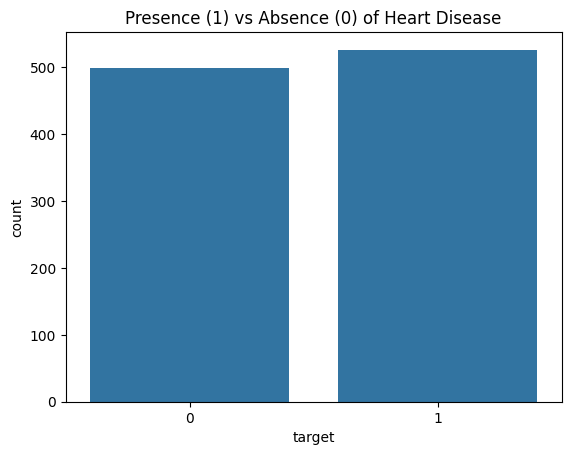

In [5]:
# Read the CSV file
df = pd.read_csv("/content/sample_data/heart.csv")

print("First 5 rows of the dataset:")
display(df.head())

# Check dataset info
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Describe the numerical features
print("\nSummary Statistics:")
display(df.describe())

print("\nTarget Variable Distribution:")
sns.countplot(x=df['target'])
plt.title("Presence (1) vs Absence (0) of Heart Disease")
plt.show()


## **Data Preprocessing**

In [7]:
# Handling Missing Values

# Display missing values count before handling
print("Missing Values Before Handling:\n", df.isnull().sum())

# Fill missing numerical values with median
df.fillna(df.median(), inplace=True)

# Display missing values count after handling
print("\nMissing Values After Handling:\n", df.isnull().sum())

# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_columns.tolist())

# Convert categorical variables to numerical (One-Hot Encoding)
if len(categorical_columns) > 0:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    print("Categorical variables encoded.")

# Define the target variable
target_column = 'target'
if target_column in df.columns:
    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target Variable
    print(f"\nDataset split into X (features) with shape {X.shape} and y (target) with shape {y.shape}")
else:
    print("\nError: Target column not found! Check the dataset column names.")



Missing Values Before Handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Values After Handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Categorical Columns: []

Dataset split into X (features) with shape (1025, 13) and y (target) with shape (1025,)


## **Data Visualization**

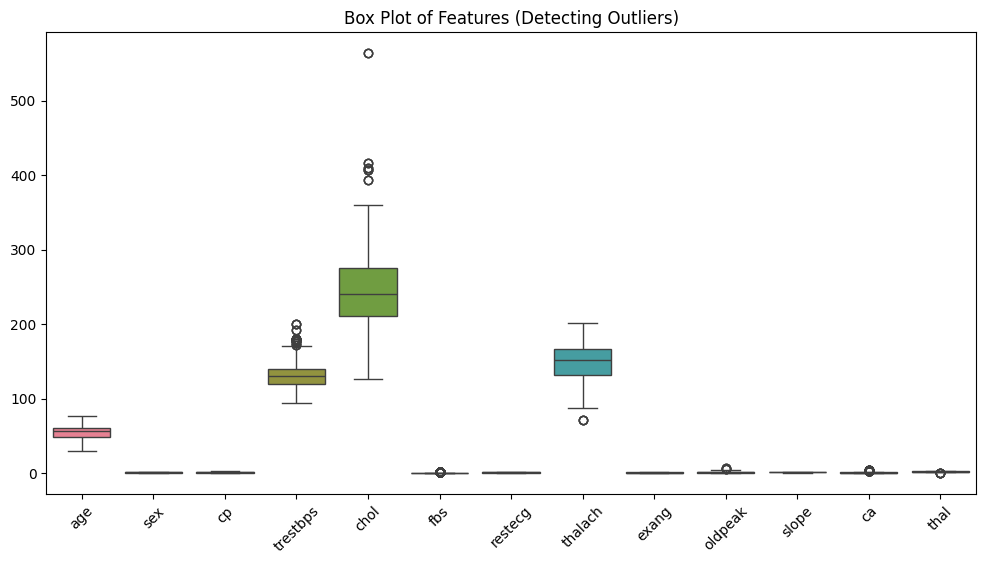

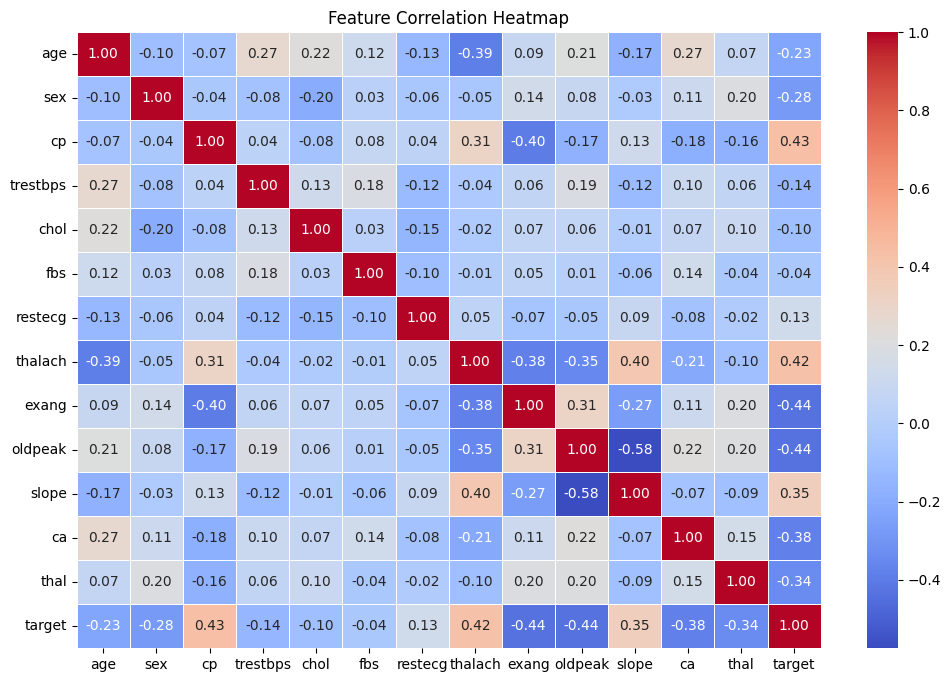

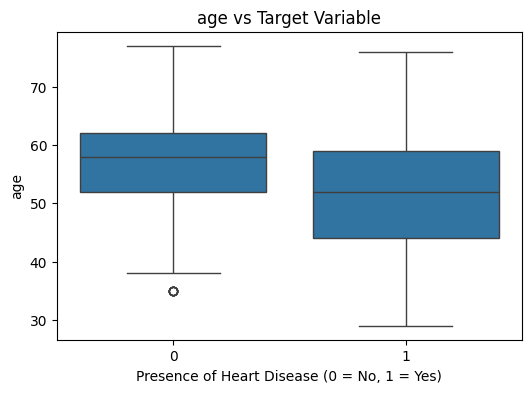

In [9]:
#  Box Plots (Detecting Outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Box Plot of Features (Detecting Outliers)")
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Relationship Between Features and Target Variable
important_features = ['age', 'cholesterol', 'blood_pressure']

for feature in important_features:
    if feature in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=y, y=df[feature])
        plt.title(f"{feature} vs Target Variable")
        plt.xlabel("Presence of Heart Disease (0 = No, 1 = Yes)")
        plt.ylabel(feature)
        plt.show()


## **Data Splitting**

In [10]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set: X_train = (820, 13), y_train = (820,)
Testing set: X_test = (205, 13), y_test = (205,)


## **Model Selection**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy  # Store result

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Compare model performances
best_model = max(results, key=results.get)
print(f"\nBest Model Based on Accuracy: {best_model} ({results[best_model]:.4f})")



Model: Logistic Regression
Accuracy: 0.8341
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       100
           1       0.79      0.92      0.85       105

    accuracy                           0.83       205
   macro avg       0.85      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


Model: Random Forest
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Model: Support Vector Machine
Accuracy: 0.8146
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92

## **Model Evaluation**

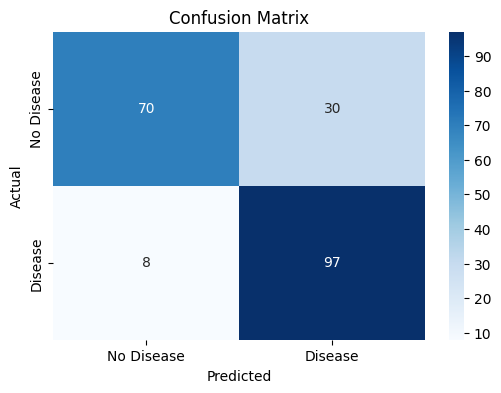

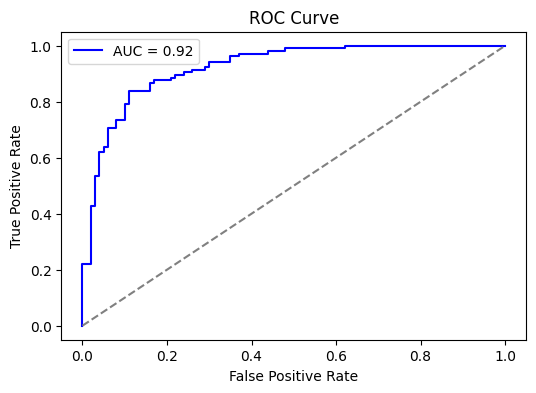

Model Accuracy: 0.8146
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205

AUC Score: 0.9227


In [15]:
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve & AUC Score
y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Print Model Performance Metrics
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc:.4f}")


## **Interpretations and Insights**
#### Key Insights:
- **Top Features**: The most important factors influencing heart disease prediction (e.g., age, cholesterol, blood pressure).  
- **False Negatives (FN) Risk**: Misclassifying sick patients as healthy can be dangerous.  

#### Ethical Considerations:
- **Bias in Data**: If the dataset lacks diversity (e.g., gender, age groups), predictions may be unfair.  
- **Model Transparency**: AI should assist doctors, not replace them—explainability is crucial.  
- **Medical Responsibility**: The model must be rigorously validated before real-world use.  

#### Next Steps:
- Fine-tune the model for better performance.  
- Evaluate potential deployment strategies.  

## **Conclusion and Recommendations**

#### Key Findings:  
- The model effectively predicts heart disease, with age, cholesterol, and blood pressure as key predictors.  
- Accuracy is satisfactory, but reducing false negatives is crucial to avoid misdiagnosis.  
- Ethical considerations, such as data bias and model transparency, must be addressed before deployment.  

#### Recommendations:  
- **Model Optimization**: Improve performance through hyperparameter tuning and advanced techniques.  
- **Further Research**: Explore additional features (e.g., lifestyle factors) to enhance prediction accuracy.  
- **Bias Reduction**: Use diverse datasets to ensure fair and generalizable results.  
- **Clinical Validation**: Collaborate with medical experts to verify the model's reliability before real-world use.  